In [1]:
import pandas, numpy, qnorm

In [2]:
import scipy, scipy.signal
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'axes.labelsize':40, 
                            'figure.figsize':(12, 8)})

# user-defined variables

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

input_files = [positive_input_file, negative_input_file, basic_input_file]
labels = ['positive', 'negative', 'basic']

In [33]:
path

'/Users/adrian/research/vigur/data/metabolomics/targeted/EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'

In [34]:
! open /Users/adrian/research/vigur/data/metabolomics/targeted/EC008_ROSA_PMVEC_INTRA_BASIC.xlsx

In [38]:
metadata = pandas.read_excel(path, sheet_name=0, index_col=1)
metadata

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1_rab_neg,PMUEC_INTRA_EC008_250,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,1,1
Pool1_rab_neg,PMUEC_INTRA_EC008_251,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,2,1
Pool1_rab_neg,PMUEC_INTRA_EC008_252,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,3,1
Pool2_rab_neg,PMUEC_INTRA_EC008_254,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,4,1
A313,PMUEC_INTRA_EC008_256,A313,4,4,4,2,0,0,300000,HILIC_RAB_BASIC_20min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
008-19,PMUEC_INTRA_EC008_341,008-19,2,4,4,1,0,0,38000,HILIC_RAB_BASIC_20min,33,2
008-26,PMUEC_INTRA_EC008_342,008-26,2,24,24,2,0,0,38000,HILIC_RAB_BASIC_20min,34,2
008-13,PMUEC_INTRA_EC008_343,008-13,1,24,24,1,0,0,74000,HILIC_RAB_BASIC_20min,35,2


# broadly exploring distributions

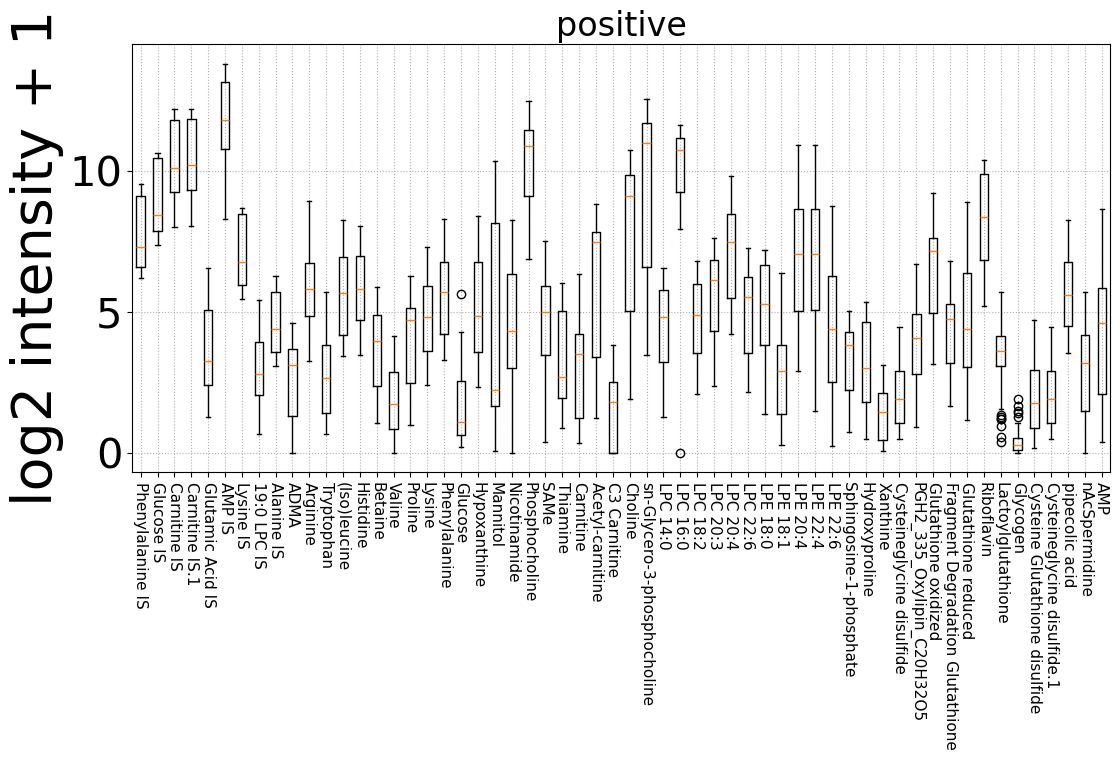

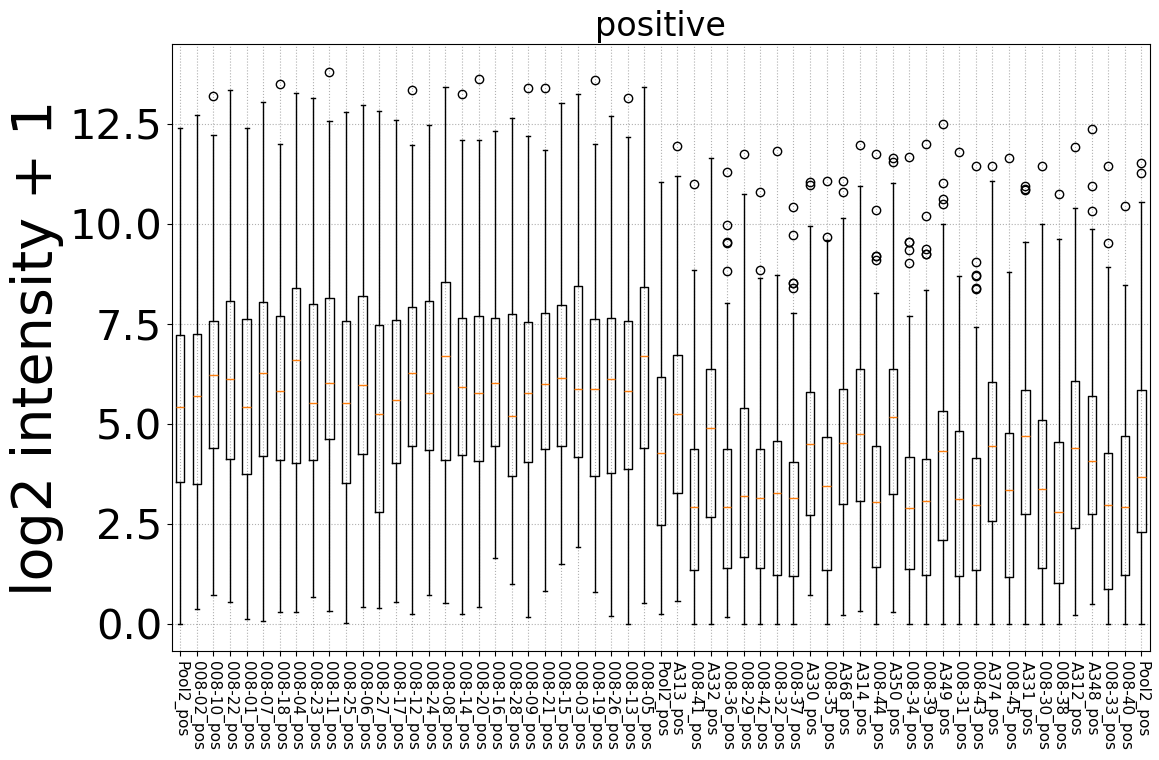

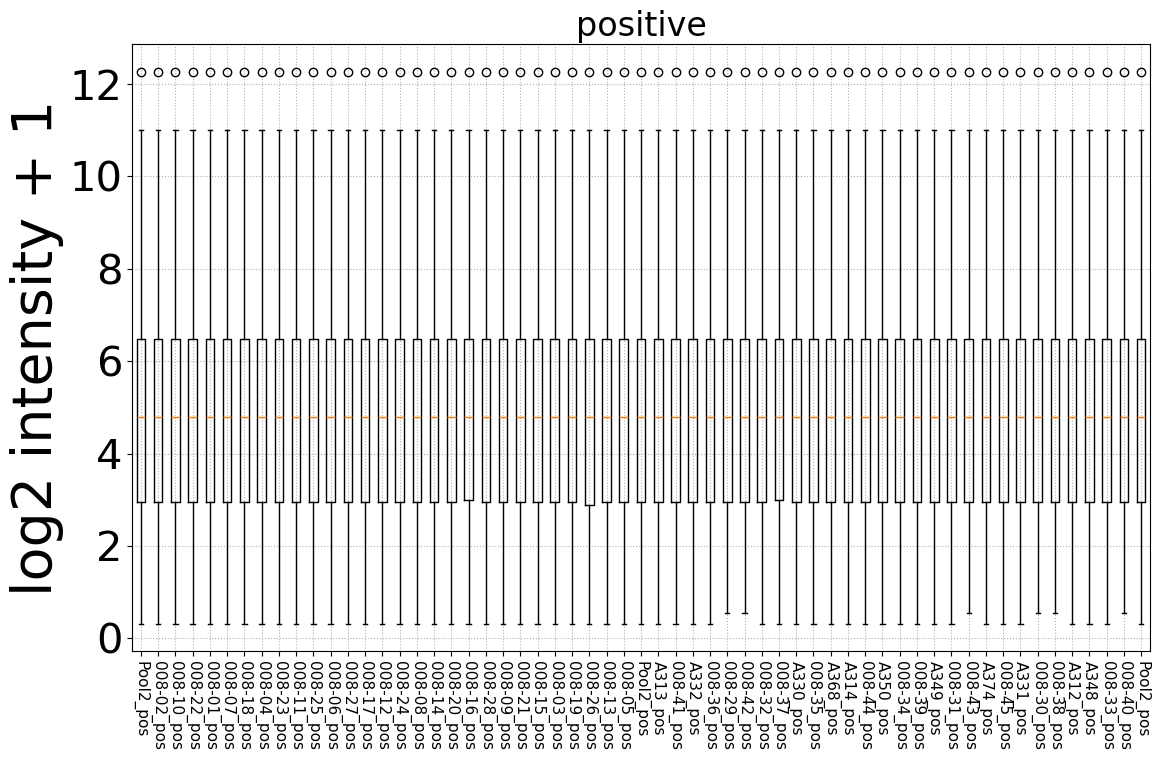

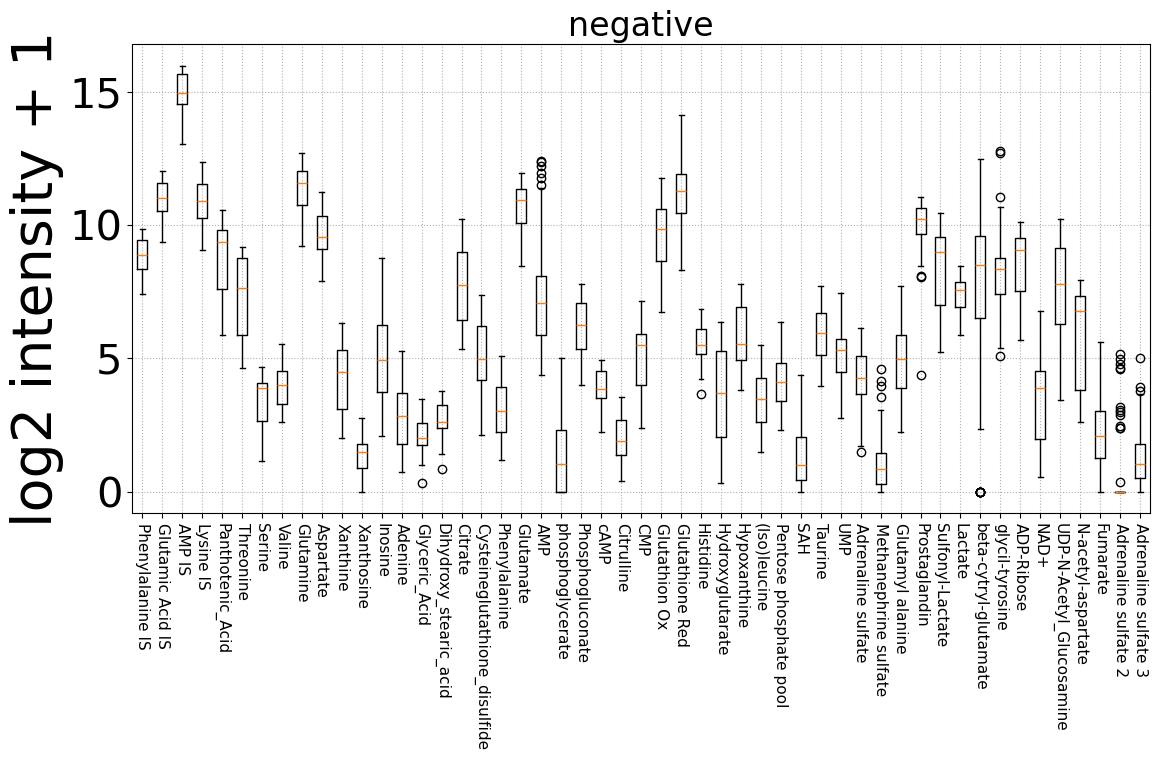

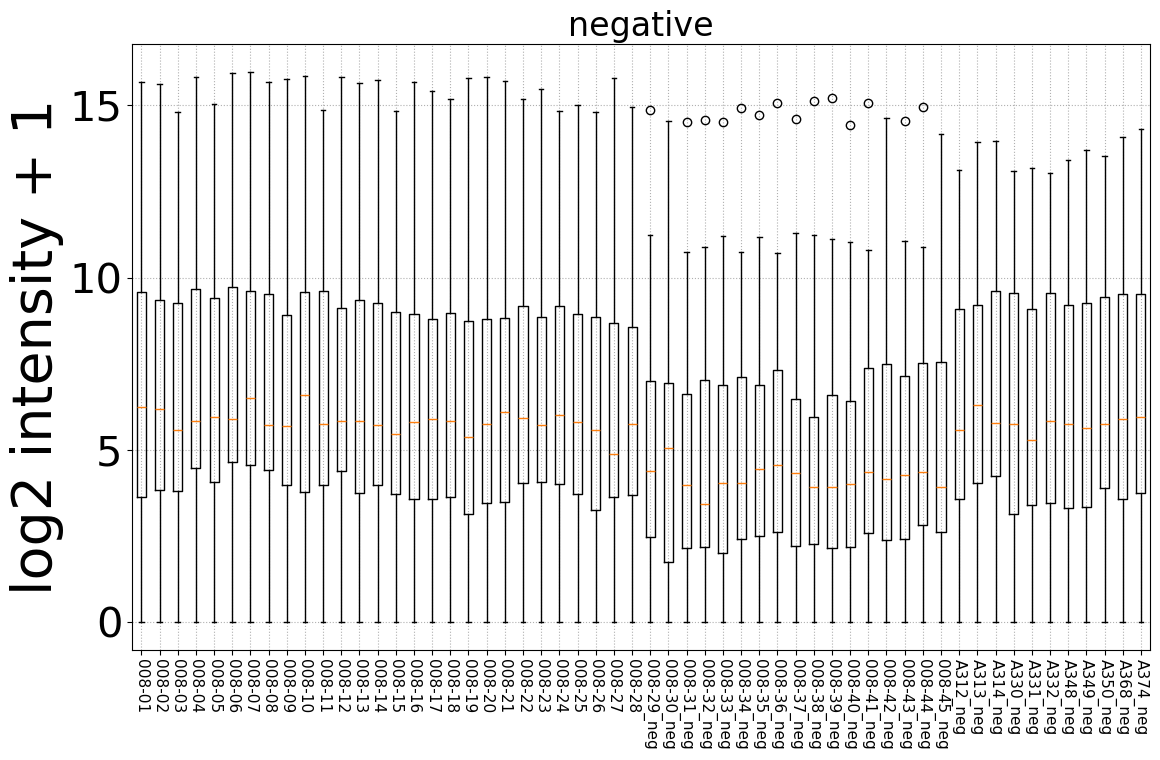

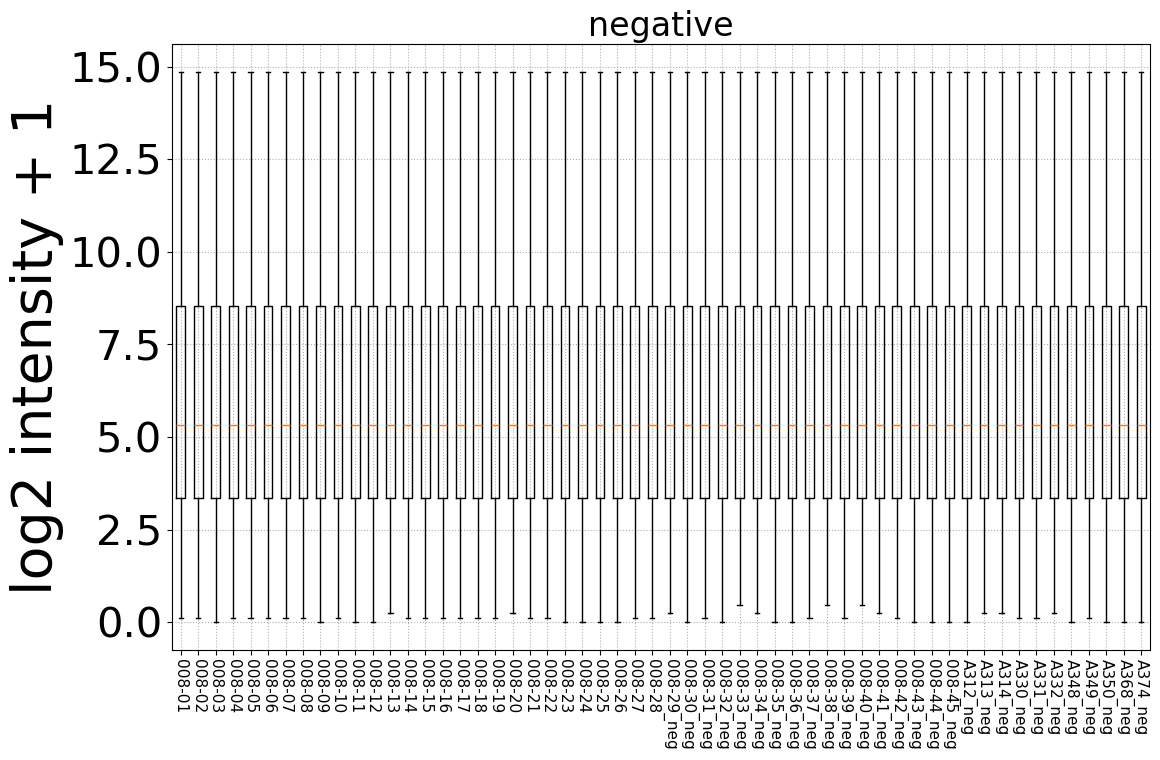

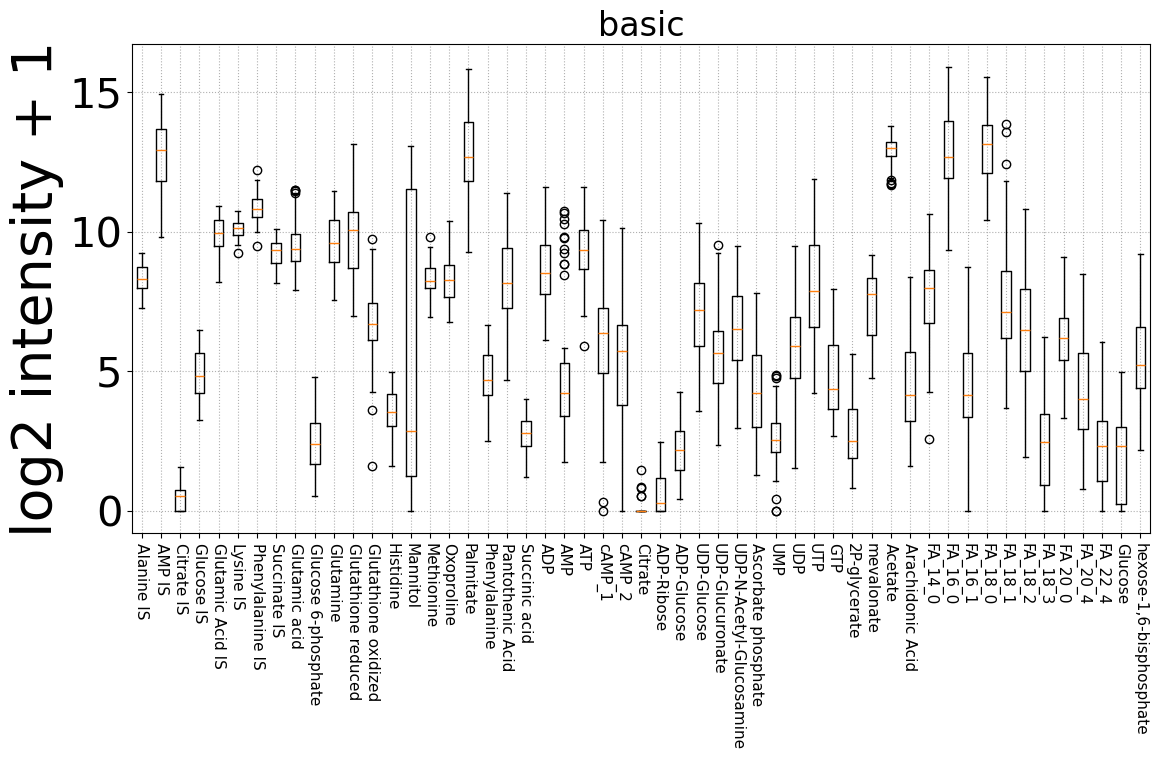

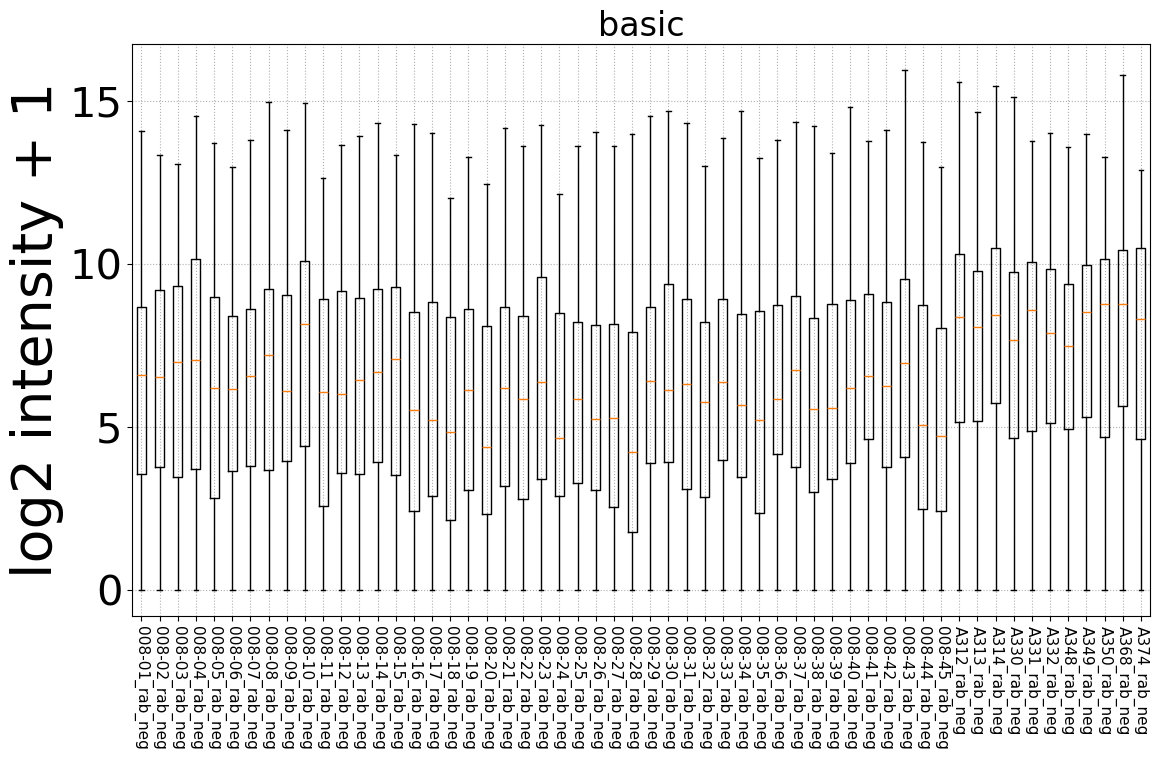

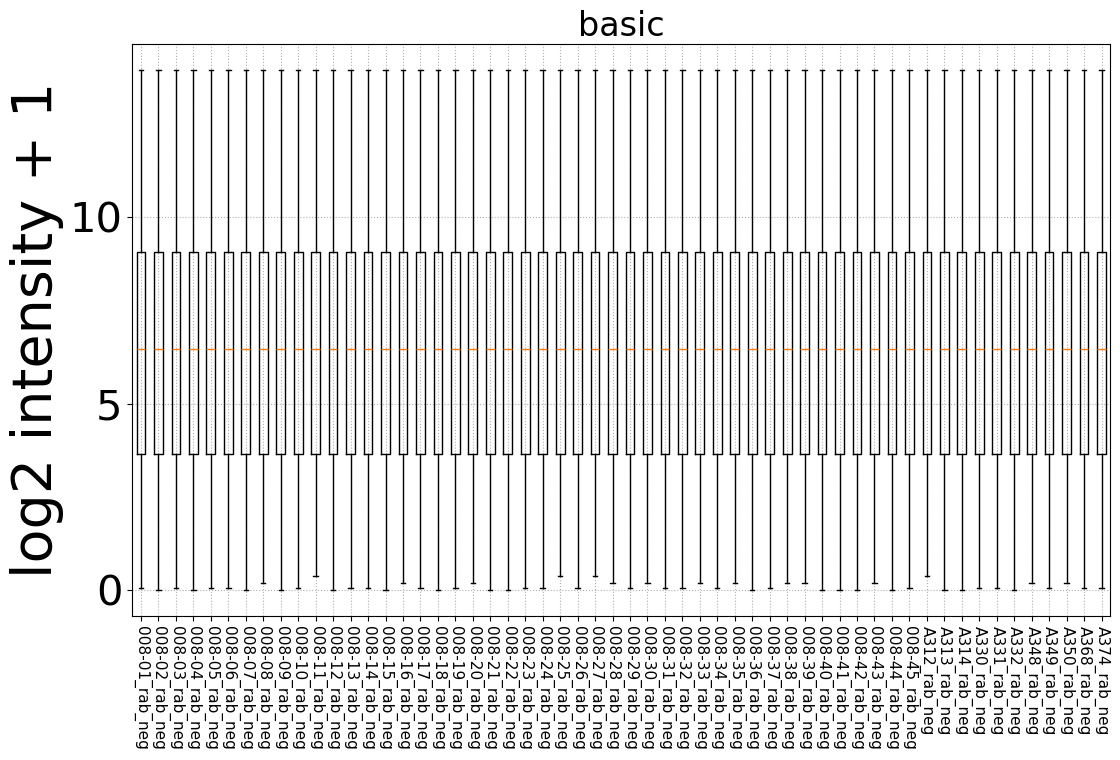

In [12]:
all_dfs = []
for i in range(len(input_files)):

    input_file = input_files[i]
    label = labels[i]
    
    path = input_dir + input_file
    df = pandas.read_excel(path, sheet_name=1, index_col=0)
    
    log2intensity = numpy.log2(df+1)

    #
    # display metabolite distributions
    #

    matplotlib.pyplot.boxplot(log2intensity)

    matplotlib.pyplot.xticks(range(1,len(df.columns)+1), df.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')

    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # show sample distributions
    #
    log_df = numpy.log2(df+1)
    transpose = log2intensity.transpose()

    matplotlib.pyplot.boxplot(transpose)
    matplotlib.pyplot.xticks(range(1,len(transpose.columns)+1), transpose.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # perform quantile normalization
    #
    qndf = qnorm.quantile_normalize(transpose, axis=1)

    matplotlib.pyplot.boxplot(qndf)
    matplotlib.pyplot.xticks(range(1,len(qndf.columns)+1), qndf.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    all_dfs.append(qndf)

The conclusion from these figures is that:
- quantification units are intensities.
- quantification is not quantitative.
- we need quantile normalization.

# visualize PCA of samples

In [16]:
print(len(qndf.columns), qndf.columns[:10])

56 Index(['008-01_rab_neg', '008-02_rab_neg', '008-03_rab_neg', '008-04_rab_neg',
       '008-05_rab_neg', '008-06_rab_neg', '008-07_rab_neg', '008-08_rab_neg',
       '008-09_rab_neg', '008-10_rab_neg'],
      dtype='object', name='Sample')


[0.25535018 0.16293659]
0 008-01_rab_neg
1 008-02_rab_neg
2 008-03_rab_neg
3 008-04_rab_neg
4 008-05_rab_neg
5 008-06_rab_neg
6 008-07_rab_neg
7 008-08_rab_neg
8 008-09_rab_neg
9 008-10_rab_neg
10 008-11_rab_neg
11 008-12_rab_neg
12 008-13_rab_neg
13 008-14_rab_neg
14 008-15_rab_neg
15 008-16_rab_neg
16 008-17_rab_neg
17 008-18_rab_neg
18 008-19_rab_neg
19 008-20_rab_neg
20 008-21_rab_neg
21 008-22_rab_neg
22 008-23_rab_neg
23 008-24_rab_neg
24 008-25_rab_neg
25 008-26_rab_neg
26 008-27_rab_neg
27 008-28_rab_neg
28 008-29_rab_neg
29 008-30_rab_neg
30 008-31_rab_neg
31 008-32_rab_neg
32 008-33_rab_neg
33 008-34_rab_neg
34 008-35_rab_neg
35 008-36_rab_neg
36 008-37_rab_neg
37 008-38_rab_neg
38 008-39_rab_neg
39 008-40_rab_neg
40 008-41_rab_neg
41 008-42_rab_neg
42 008-43_rab_neg
43 008-44_rab_neg
44 008-45_rab_neg
45 A312_rab_neg
46 A313_rab_neg
47 A314_rab_neg
48 A330_rab_neg
49 A331_rab_neg
50 A332_rab_neg
51 A348_rab_neg
52 A349_rab_neg
53 A350_rab_neg
54 A368_rab_neg
55 A374_rab_neg


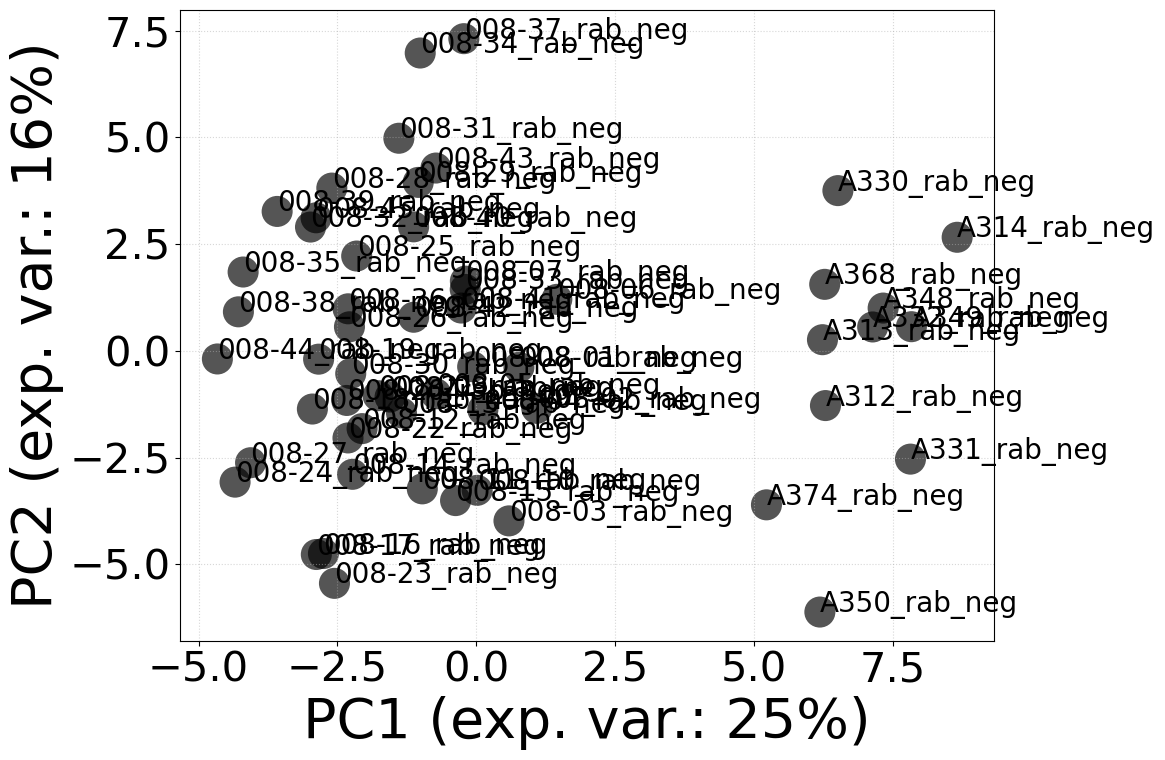

In [40]:
wdf = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(wdf)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    label = wdf.index[i]
    print(i, wdf.index[i])
    matplotlib.pyplot.scatter(locations[i, 0], locations[i, 1], s=500, c='black', marker='o', alpha=2/3, edgecolors='none')
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], label)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# pca on samples
# subset specific samples for heatmap
# statistical tests for particular conditions
# heatmap of only differential variables, one heatmap for lipids, another for metabolites